<a href="https://colab.research.google.com/github/parkjh21c/ML-DL/blob/main/smarthon_model_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/smarthon/알테오젠_최종.xlsx')

df['일자'] = pd.to_datetime(df['일자'])

# 데이터 순서 뒤집고 인덱스 다시 정의
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True)
df = df.set_index('일자')

df

,이동평균five,이동평균ten,이동평균twenty,이동평균(five-ten),Bollinger Bands중심선,상한선,하한선,ADX,CCI,MACD Oscillator,...,금리,등락률,BPS,PBR,공매도 수량_거래량_전체,공매도 금액_거래대금_전체,코스피 등락률,감정,오늘 주가상승여부,다음날 주가상승여부
일자,,,,,,,,,,,,,,,,,,,,,
2023-01-02,37730,37320,38280.0,410,37316.67,39449.36,35183.97,36.44,139.53,389.68,...,3.26,3.53,2634,15.03,76942,3.126622e+09,-0.48,3.055137,1,0
2023-01-03,37910,37260,38095.0,650,37338.33,39469.44,35207.22,27.52,3.63,-50.06,...,3.40,-8.33,2634,13.78,59699,2.209756e+09,-0.31,-0.833204,0,0
2023-01-04,37610,37140,37905.0,470,37226.67,39465.95,34987.38,24.17,-74.49,-253.24,...,2.99,-1.93,2634,13.52,56557,2.027763e+09,1.68,1.997849,0,0
2023-01-05,36990,36910,37737.5,80,37038.33,39380.74,34695.92,21.85,-95.90,-301.81,...,3.18,-1.12,2634,13.36,46655,1.664621e+09,0.38,1.660705,0,1
2023-01-06,36450,36660,37497.5,-210,36781.67,39191.32,34372.01,23.46,-89.03,-199.27,...,3.07,0.99,2634,13.50,29771,1.050172e+09,1.12,0.999843,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-14,307000,310450,303475.0,-3450,309950.00,318821.34,301078.66,25.07,-46.79,-746.13,...,2.99,2.84,1511,203.53,2795,1.100200e+02,0.31,1.506337,1,0
2025-01-15,305700,309850,302800.0,-4150,309783.33,318761.12,300805.55,22.03,-44.04,-746.86,...,3.03,-1.30,1511,200.88,2795,1.085900e+02,-0.02,-2.397481,0,1
2025-01-16,306300,311050,302875.0,-4750,310650.00,319016.94,302283.06,22.28,91.67,447.21,...,3.07,2.80,1511,206.51,2795,1.116300e+02,1.23,0.530633,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2023-01-02 to 2025-01-20
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   이동평균five            502 non-null    int64  
 1   이동평균ten             502 non-null    int64  
 2   이동평균twenty          502 non-null    float64
 3   이동평균(five-ten)      502 non-null    int64  
 4   Bollinger Bands중심선  502 non-null    float64
 5   상한선                 502 non-null    float64
 6   하한선                 502 non-null    float64
 7   ADX                 502 non-null    float64
 8   CCI                 502 non-null    float64
 9   MACD Oscillator     502 non-null    float64
 10  Slow %K             502 non-null    float64
 11  Slow %D             502 non-null    float64
 12  Slow(%K-%D)         502 non-null    float64
 13  이격도five             502 non-null    float64
 14  이격도ten              502 non-null    float64
 15  이격도twenty           502 non-null    fl

In [ ]:
df = df.select_dtypes(exclude=["object"])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2023-01-02 to 2025-01-20
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   이동평균five            502 non-null    int64  
 1   이동평균ten             502 non-null    int64  
 2   이동평균twenty          502 non-null    float64
 3   이동평균(five-ten)      502 non-null    int64  
 4   Bollinger Bands중심선  502 non-null    float64
 5   상한선                 502 non-null    float64
 6   하한선                 502 non-null    float64
 7   ADX                 502 non-null    float64
 8   CCI                 502 non-null    float64
 9   MACD Oscillator     502 non-null    float64
 10  Slow %K             502 non-null    float64
 11  Slow %D             502 non-null    float64
 12  Slow(%K-%D)         502 non-null    float64
 13  이격도five             502 non-null    float64
 14  이격도ten              502 non-null    float64
 15  이격도twenty           502 non-null    fl

주가 그래프(2023/01/01 - 2024/12/31)   
index - 일자, 종가 column 필요

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates


# plt.figure(figsize=(12,6))
# plt.plot(df.index, df['종가'])

# plt.xlabel('Date')
# plt.ylabel('Price($)')

# # x축 범위 설정
# plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-12-31'))

# # x축 눈금 설정
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# # x축 레이블 회전
# plt.xticks(rotation=45)

# plt.yticks([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])

# plt.show()

LSTM + 랜덤포레스트

1. 데이터 분리(섞기 X)   


In [ ]:
from sklearn.model_selection import train_test_split

target_column = df.columns[-1]

X = df.drop(target_column, axis=1)
y = df[target_column]
X= X.rename(str,axis="columns")
train_size = int((len(X) - 1))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(X_train.shape, y_train.shape)
y_train

(501, 39) (501,)


,다음날 주가상승여부
일자,
2023-01-02,0
2023-01-03,0
2023-01-04,0
2023-01-05,1
2023-01-06,1
...,...
2025-01-13,1
2025-01-14,0
2025-01-15,1


랜덤 포레스트를 통해 중요한 특징 찾기   
( feature_importances_ : 해당 피처가 클래스를 나누는데 얼마나 영향을 미쳤는지를 0 ~ 1로 표기하는 척도)    


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 중요한 특징 선택
important_features = rf.feature_importances_

important_features를 그래프로 나타내어 중요도 비교

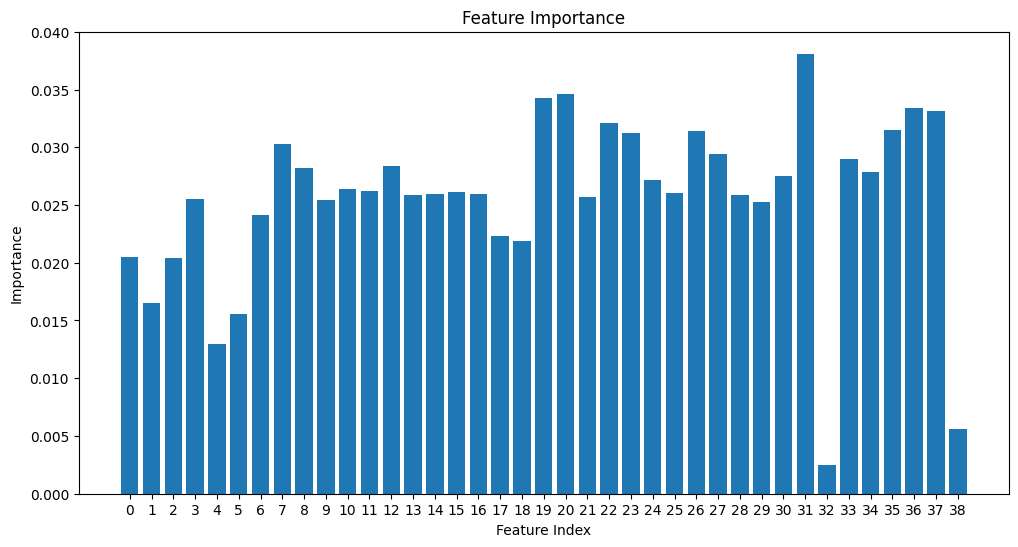

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))
plt.bar(important_features.argsort(), important_features[important_features.argsort()])
plt.xticks(np.arange(len(important_features)))
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

대비 등락률 => 추세 때문에 높은 연관성(예상)


위 Features들을 높은 순서대로 정렬한 뒤, 0.015 이상 선택

In [ ]:
important_features

array([0.02049584, 0.01648372, 0.02038732, 0.02552917, 0.01296257,
       0.01552183, 0.02413539, 0.0302543 , 0.02816363, 0.02546627,
       0.02639489, 0.02620416, 0.028364  , 0.02586216, 0.02595569,
       0.02613027, 0.02593572, 0.02227346, 0.0219132 , 0.03425991,
       0.03459628, 0.02568968, 0.03214206, 0.03119342, 0.02716222,
       0.0260162 , 0.03138739, 0.02939557, 0.02583458, 0.02524979,
       0.02747238, 0.03809853, 0.00248307, 0.02899594, 0.02786215,
       0.03153614, 0.03340856, 0.03316124, 0.0056213 ])

In [ ]:
top_features = important_features.argsort()[:][::-1] # Feature 선택 수를 변경하고 싶을 시 변경 필요

top_features_indices = []
for i in range(len(top_features)):
  if (top_features[i] >= 0.015):
    top_features_indices.append(top_features[i])

X_train = X_train.iloc[:,top_features_indices]
X_test = X_test.iloc[:,top_features_indices]
X_train.columns

Index(['등락률', '거래량', 'OBV-Signal', '코스피 등락률', '감정', '거래대금', '공매도 금액_거래대금_전체',
       '기관순매수금액(거래소)', '외국인순매수량(거래소)', 'ADX', '개인순매수량(거래소)', 'PBR',
       'Slow(%K-%D)', 'CCI', '공매도 수량_거래량_전체', '금리', '외국인순매수금액(거래소)', 'Slow %K',
       'Slow %D', '이격도twenty', '기관순매수량(거래소)', '이격도ten', 'RSI', '이격도five',
       '개인순매수금액(거래소)', 'Chaikin Money Flow', '이동평균(five-ten)',
       'MACD Oscillator', '환율(원/달러)', '하한선', 'OBV', 'Signal', '이동평균twenty',
       '이동평균ten', '상한선', 'Bollinger Bands중심선', '오늘 주가상승여부', 'BPS'],
      dtype='object')

시가 총액, 상장 주식수, BPS(주당순자산가치), 주당배당금, 외국인 한도수량 은 거의 상관 없거나 아예 상관 없는걸로 보임

In [ ]:
#A, B, C, D
A_train_size = int((len(X_train) - 1)*0.7)
X_A_train, X_C_val = X_train[:A_train_size], X_train[A_train_size:]
y_B_train, y_D_val = y_train[:A_train_size], y_train[A_train_size:]

In [ ]:
print(len(X_A_train), len(y_B_train))
print(len(X_C_val), len(y_D_val))

350 350
151 151


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 스케일링
scaler = MinMaxScaler()
A_scaled_data = scaler.fit_transform(X_A_train)

# 시퀀스 생성 함수
def create_sequences(data, label, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:(i+seq_length)]
        X.append(seq)
        y.append(label[i+seq_length])
    return np.array(X), np.array(y)

def create_sequences_without_y(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
X_s, y_s = create_sequences(A_scaled_data, y_B_train, seq_length=10)

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.2, shuffle=False)

<ipython-input-12-fc9b71ea5446>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


In [ ]:
print(len(X_train), len(y_train))
print(len(X_s), len(y_s))
print(len(X_s_train), len(y_s_train))
print(len(X_s_test), len(y_s_test))

501 501
340 340
272 272
68 68


결과적으로 전체에서 10개의 데이터가 빠진 형태

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001,clipnorm=1.0)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_s_train.shape[1], X_s_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # 이진 분류 문제의 경우 sigmoid 활성화 함수 사용

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adam 옵티마이저와 이진 크로스엔트로피 손실 사용

# 모델 학습
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_s_train, y_s_train,
    epochs=50, batch_size=32,
    validation_data=(X_s_test, y_s_test),
    callbacks=[early_stopping]
)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.5060 - loss: 0.6940 - val_accuracy: 0.4706 - val_loss: 0.6986
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4682 - loss: 0.6945 - val_accuracy: 0.4265 - val_loss: 0.7101
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6083 - loss: 0.6805 - val_accuracy: 0.4853 - val_loss: 0.6948
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5526 - loss: 0.6902 - val_accuracy: 0.4853 - val_loss: 0.6953
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5402 - loss: 0.6941 - val_accuracy: 0.4265 - val_loss: 0.7336
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5246 - loss: 0.6855 - val_accuracy: 0.4706 - val_loss: 0.7047
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5821 - loss: 0.6857 - val_accuracy: 0.4853 - val_loss: 0.7048
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5511 - loss: 0.6845 - val_accuracy: 0.4265 - val_loss: 0.7127

scaled_data_test

In [ ]:
C_scaled_data = scaler.fit_transform(X_C_val)

C_val, D_val = create_sequences(C_scaled_data, y_D_val,seq_length=10)

C_pred_lstm = model.predict(C_val)
print(C_pred_lstm)

<ipython-input-12-fc9b71ea5446>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step
[[0.4780433 ]
 [0.48577324]
 [0.49712798]
 [0.5076511 ]
 [0.51466614]
 [0.5183647 ]
 [0.518656  ]
 [0.5149916 ]
 [0.5103506 ]
 [0.50735   ]
 [0.50332415]
 [0.5042305 ]
 [0.5072813 ]
 [0.5107688 ]
 [0.5191522 ]
 [0.5260942 ]
 [0.5341278 ]
 [0.54098123]
 [0.54382205]
 [0.54650056]
 [0.54422057]
 [0.5425946 ]
 [0.54054683]
 [0.54117   ]
 [0.54100096]
 [0.5385964 ]
 [0.53579146]
 [0.53398275]
 [0.53546757]
 [0.53239983]
 [0.53170633]
 [0.5244889 ]
 [0.51580137]
 [0.51208913]
 [0.512393  ]
 [0.5160869 ]
 [0.5179192 ]
 [0.5205333 ]
 [0.52181476]
 [0.5232904 ]
 [0.5253853 ]
 [0.5272842 ]
 [0.5310438 ]
 [0.52949077]
 [0.529758  ]
 [0.532717  ]
 [0.5343544 ]
 [0.5374302 ]
 [0.54178226]
 [0.5419794 ]
 [0.5406848 ]
 [0.5414127 ]
 [0.5402231 ]
 [0.5365712 ]
 [0.5306278 ]
 [0.52503234]
 [0.52576435]
 [0.5278602 ]
 [0.53119826]
 [0.5376021 ]
 [0.54141366]
 [0.5424914 ]
 [0.54280126]
 [0.5408614 ]
 [0.538564  ]
 [0.5314372 ]
 [0.5257994 ]
 [0.51809883]
 [0.51156

4. C, D 추가학습

In [ ]:
# 기존 가중치 저장
weights = model.get_weights()

# 새로운 데이터와 기존 데이터를 합침
combined_X = np.concatenate([X_s, C_val])
combined_y = np.concatenate([y_s, D_val])

# 새로운 모델 구조 생성 (기존 모델과 동일한 구조)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_s_train.shape[1], X_s_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # 이진 분류 문제의 경우 sigmoid 활성화 함수 사용
model.set_weights(weights)  # 기존 모델 가중치 로드

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 다시 학습
history = model.fit(
    combined_X, combined_y,
    epochs=50, batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4975 - loss: 0.7021
Epoch 2/50
 7/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5618 - loss: 0.6898

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5308 - loss: 0.6930
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5160 - loss: 0.6923
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5145 - loss: 0.6909
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4833 - loss: 0.6958
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4779 - loss: 0.6963
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4875 - loss: 0.6973
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4953 - loss: 0.6942
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4966 - loss: 0.6943
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5488 - loss: 0.6894
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5527 - loss: 0.6944
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5543 - loss: 0.6887
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5064 - 

Z 예측값 C와 합치기

In [ ]:
X_C_rf_train = X_C_val.iloc[10:]
y_D_rf_train = y_D_val.iloc[10:]
X_C_rf_train

,등락률,거래량,OBV-Signal,코스피 등락률,감정,거래대금,공매도 금액_거래대금_전체,기관순매수금액(거래소),외국인순매수량(거래소),ADX,...,환율(원/달러),하한선,OBV,Signal,이동평균twenty,이동평균ten,상한선,Bollinger Bands중심선,오늘 주가상승여부,BPS
일자,,,,,,,,,,,,,,,,,,,,,
2024-06-21,8.29,1901776,1816940.0,-0.83,-4.125142,520388,6.961695e+08,1309,167349,41.30,...,1388.3,257776.94,100581834,98764894.0,236945.0,268250,278889.73,268333.33,1,2795
2024-06-24,1.78,1246288,2297421.0,-0.70,-1.505981,355187,2.889575e+08,-5416,-13473,44.90,...,1389.0,259778.29,101828122,99530701.0,241590.0,271550,282355.05,271066.67,1,2795
2024-06-25,1.22,807498,2328689.0,0.35,2.150912,230646,8.431250e+07,2986,-21629,47.60,...,1387.5,259109.13,102635620,100306931.0,246575.0,272150,285724.21,272416.67,1,2795
2024-06-26,-1.21,675152,1240153.0,0.64,0.173332,192156,1.850815e+08,-1947,-33934,48.83,...,1388.7,258831.16,101960468,100720315.0,251575.0,273150,287402.17,273116.67,0,2795
2024-06-27,-0.52,1384490,-108253.0,-0.29,-6.854009,396474,1.857680e+08,-5637,12347,53.21,...,1385.8,258939.62,100575978,100684231.0,256695.0,274750,289360.38,274150.00,0,2795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-13,-3.39,339664,-374828.0,-1.04,-10.763060,102467,1.069800e+02,-9736,-24844,32.26,...,1467.5,300225.27,100731312,101106140.0,303725.0,309800,318874.73,309550.00,0,1511
2025-01-14,2.84,244268,-97920.0,0.31,1.506337,74986,1.100200e+02,5448,29563,25.07,...,1462.0,301078.66,100975580,101073500.0,303475.0,310450,318821.34,309950.00,1,1511
2025-01-15,-1.30,199222,-222857.0,-0.02,-2.397481,61153,1.085900e+02,513,-17643,22.03,...,1454.7,300805.55,100776358,100999215.0,302800.0,309850,318761.12,309783.33,0,1511


In [ ]:
X_C_rf_train['lstm_feature'] = C_pred_lstm
X_C_rf_train

<ipython-input-19-fe98b221ac2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_C_rf_train['lstm_feature'] = C_pred_lstm


,등락률,거래량,OBV-Signal,코스피 등락률,감정,거래대금,공매도 금액_거래대금_전체,기관순매수금액(거래소),외국인순매수량(거래소),ADX,...,하한선,OBV,Signal,이동평균twenty,이동평균ten,상한선,Bollinger Bands중심선,오늘 주가상승여부,BPS,lstm_feature
일자,,,,,,,,,,,,,,,,,,,,,
2024-06-21,8.29,1901776,1816940.0,-0.83,-4.125142,520388,6.961695e+08,1309,167349,41.30,...,257776.94,100581834,98764894.0,236945.0,268250,278889.73,268333.33,1,2795,0.478043
2024-06-24,1.78,1246288,2297421.0,-0.70,-1.505981,355187,2.889575e+08,-5416,-13473,44.90,...,259778.29,101828122,99530701.0,241590.0,271550,282355.05,271066.67,1,2795,0.485773
2024-06-25,1.22,807498,2328689.0,0.35,2.150912,230646,8.431250e+07,2986,-21629,47.60,...,259109.13,102635620,100306931.0,246575.0,272150,285724.21,272416.67,1,2795,0.497128
2024-06-26,-1.21,675152,1240153.0,0.64,0.173332,192156,1.850815e+08,-1947,-33934,48.83,...,258831.16,101960468,100720315.0,251575.0,273150,287402.17,273116.67,0,2795,0.507651
2024-06-27,-0.52,1384490,-108253.0,-0.29,-6.854009,396474,1.857680e+08,-5637,12347,53.21,...,258939.62,100575978,100684231.0,256695.0,274750,289360.38,274150.00,0,2795,0.514666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-13,-3.39,339664,-374828.0,-1.04,-10.763060,102467,1.069800e+02,-9736,-24844,32.26,...,300225.27,100731312,101106140.0,303725.0,309800,318874.73,309550.00,0,1511,0.530816
2025-01-14,2.84,244268,-97920.0,0.31,1.506337,74986,1.100200e+02,5448,29563,25.07,...,301078.66,100975580,101073500.0,303475.0,310450,318821.34,309950.00,1,1511,0.526648
2025-01-15,-1.30,199222,-222857.0,-0.02,-2.397481,61153,1.085900e+02,513,-17643,22.03,...,300805.55,100776358,100999215.0,302800.0,309850,318761.12,309783.33,0,1511,0.528834


5. (C + Z), D => rf 학습

In [ ]:
rf = RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(X_C_rf_train, y_D_rf_train)

RandomForestClassifier(n_estimators=500, random_state=42)

6. E => lstm 예측

In [ ]:
X_E_test = X[train_size - 10:]
y_E_test = y[train_size - 10:]
X_E_test = X_E_test.iloc[:,top_features_indices]

X_E_test

,등락률,거래량,OBV-Signal,코스피 등락률,감정,거래대금,공매도 금액_거래대금_전체,기관순매수금액(거래소),외국인순매수량(거래소),ADX,...,환율(원/달러),하한선,OBV,Signal,이동평균twenty,이동평균ten,상한선,Bollinger Bands중심선,오늘 주가상승여부,BPS
일자,,,,,,,,,,,,,,,,,,,,,
2025-01-06,-0.94,577381,-82008.0,1.91,5.400621,180411,112.88,-9399,-118461,56.08,...,1460.0,279904.22,101237524,101319532.0,302450.0,298250,315729.11,297816.67,0,887
2025-01-07,3.33,794138,534098.0,0.14,-2.378584,258162,116.64,-1327,35354,63.61,...,1453.0,281120.85,102031662,101497564.0,303200.0,302200,321845.81,301483.33,1,887
2025-01-08,-4.91,654854,-90567.0,1.16,2.271222,205811,110.91,-58250,-117644,61.64,...,1459.6,286859.74,101376808,101467375.0,303400.0,305500,322806.93,304833.33,0,887
2025-01-09,-0.32,641125,-548769.0,0.03,-1.866628,197594,110.55,-25586,6467,47.35,...,1460.0,294701.54,100735683,101284452.0,304600.0,308700,320531.80,307616.67,0,1511
2025-01-10,0.16,335293,-160107.0,-0.24,-0.517344,103170,110.73,-11986,-7686,36.63,...,1472.0,299782.18,101070976,101231083.0,304175.0,310050,319017.82,309400.00,1,1511
2025-01-13,-3.39,339664,-374828.0,-1.04,-10.763060,102467,106.98,-9736,-24844,32.26,...,1467.5,300225.27,100731312,101106140.0,303725.0,309800,318874.73,309550.00,0,1511
2025-01-14,2.84,244268,-97920.0,0.31,1.506337,74986,110.02,5448,29563,25.07,...,1462.0,301078.66,100975580,101073500.0,303475.0,310450,318821.34,309950.00,1,1511
2025-01-15,-1.30,199222,-222857.0,-0.02,-2.397481,61153,108.59,513,-17643,22.03,...,1454.7,300805.55,100776358,100999215.0,302800.0,309850,318761.12,309783.33,0,1511
2025-01-16,2.80,289445,49941.0,1.23,0.530633,90463,111.63,8949,72876,22.28,...,1457.5,302283.06,101065803,101015862.0,302875.0,311050,319016.94,310650.00,1,1511


In [ ]:
# 전체 테스트 데이터
scaled_E_test = scaler.fit_transform(X_E_test)
E_test, _ = create_sequences(scaled_E_test, y_E_test, seq_length=10)

<ipython-input-12-fc9b71ea5446>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


In [ ]:
scaled_E_test.shape

(11, 38)

In [ ]:
E_pred_lstm = model.predict(E_test)
print(E_pred_lstm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
[[0.31103057]]


In [ ]:
X_test['lstm_feature']=E_pred_lstm
X_test

,등락률,거래량,OBV-Signal,코스피 등락률,감정,거래대금,공매도 금액_거래대금_전체,기관순매수금액(거래소),외국인순매수량(거래소),ADX,...,하한선,OBV,Signal,이동평균twenty,이동평균ten,상한선,Bollinger Bands중심선,오늘 주가상승여부,BPS,lstm_feature
일자,,,,,,,,,,,,,,,,,,,,,
2025-01-20,3.58,455776,259196.0,-0.14,2.324781,144411,113.95,16408,37609,25.26,...,301821.0,101324730,101065534.0,304250.0,310250,319179.0,310500.0,1,1511,0.311031


In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([0])

lstm결과가 기존 데이터 row 개수보다 20개 적으므로 train데이터에서 20개를 제외하고 학습 진행

LSTM + Random Forest 예측 정확도

In [ ]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 0.00%


LSTM 예측 결과 정확도

In [ ]:
lstm_pred = []*len(E_pred_lstm)
for i in range(len(E_pred_lstm)):
  if (i >= 0.5):
    lstm_pred.append(1)
  else:
    lstm_pred.append(0)

accuracy = accuracy_score(y_test, lstm_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.00%
